In [24]:
#import all the required libraries 
import numpy as np
import pandas as  pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#from sklearn we don't need anything to take into as stastmodel takes care of logit regression nicely

In [25]:
# Load the data files here
read_data = pd.read_csv('2.01.+Admittance.csv')
# Convert the categorical into dummies using map
data = read_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})
pd.options.display.max_rows = 999
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
5,1755,1
6,1775,1
7,1887,1
8,1893,1
9,1580,0


In [26]:
# Declare independent and dependent features
y = data['Admitted']
x1 = data['SAT']

Text(0, 0.5, 'Admitted')

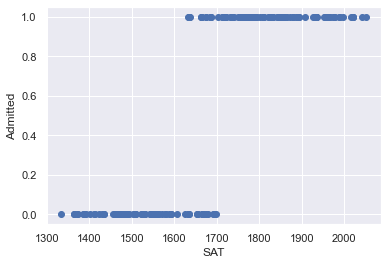

In [27]:
# Plot and seee what the scatter has for us
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT')
plt.ylabel('Admitted')
# this chart makes no senes - what we need here is who to have regression line? 
# this can't be a linaer one for sure

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


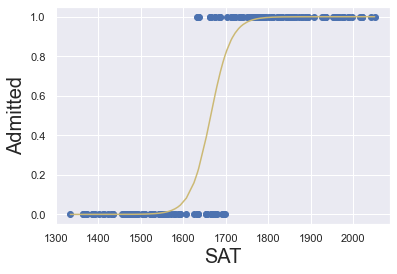

In [34]:
# Logistic Regression Curve 
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()


Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


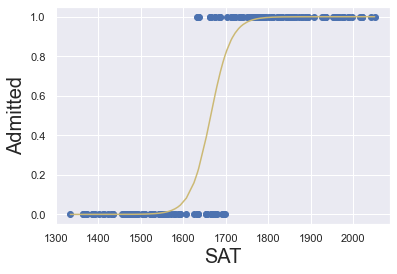

In [36]:
# Creating a logit regression (we will discuss this in another notebook)
reg_log = sm.Logit(y,x)
# Fitting the regression
results_log = reg_log.fit()

# Creating a logit function, depending on the input and coefficients
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

# Sorting the y and x, so we can plot the curve
f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
# Plotting the curve
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

In [37]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Mon, 22 Mar 2021   Pseudo R-squ.:                  0.7992
Time:                        16:28:28   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [66]:
# Using binary predictors in the logistic regression
read_data2 = pd.read_csv('2.02.+Binary+predictors.csv')
# Convert the categorical into dummies using map
read_data3 = read_data2.copy()
read_data3['Admitted'] = read_data3['Admitted'].map({'Yes':1,'No':0})
read_data3['Gender'] = read_data3['Gender'].map({'Female':1,'Male':0})
read_data3

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0
5,1755,1,1
6,1775,1,1
7,1887,1,1
8,1893,1,1
9,1580,0,0


In [67]:
# Declare independent and dependent features
y2 = read_data3['Admitted']
x2 = read_data3[['SAT','Gender']]

In [82]:
# Logistic Regression Curve 
x3 = sm.add_constant(x2)
# Creating a logit regression (we will discuss this in another notebook)
reg_log = sm.Logit(y2,x3)
# Fitting the regression
results_log = reg_log.fit()

results_log.summary()
# Note that the coeffcient (weights) here for  Gender explains how odds of a male to female getting
# admitted taking exponential of this will result in the times the male is preffered compared to female

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Mon, 22 Mar 2021   Pseudo R-squ.:                  0.8249
Time:                        17:11:53   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### Accuracy of the model

In [83]:
# Accuracy calculation of the model
# We can compare the predicted values with the actual values, if 80% of them consincides
# then we can say that the model is better
# Let's summarize these in log table
# we will use the stats model's accuracy method called pred table

np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
#np.set_printoptions(formatter=None)
results_log.predict()

array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

In [84]:
np.array(data['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [85]:
results_log.pred_table()

array([[69.00, 5.00],
       [4.00, 90.00]])

In [86]:
# Confusion matrix here
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df


,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


In [87]:
# Accuracy value here
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.9464285714285714

### Testing the model

In [88]:
# Let's load new CSV file 
test = pd.read_csv('2.03.+Test+dataset.csv')

In [89]:
test['Admitted'] = test['Admitted'].map({'Yes':1,'No':0})
test['Gender'] = test['Gender'].map({'Female':1,'Male':0})
test

,SAT,Admitted,Gender
0,1323,0,0
1,1725,1,1
2,1762,1,1
3,1777,1,0
4,1665,0,0
5,1556,1,1
6,1731,1,1
7,1809,1,1
8,1930,1,1
9,1708,1,0


In [90]:
# Next steps are 
# We will use our model to make predictions based on the test data
# we will compare those with the actual outcomes
# calcute the accuracy 
# Create a confusion matrix finally

In [91]:
# check the order in the data

In [93]:
x3
# Order is very imp the coefficent in the regression needs it in order

,const,SAT,Gender
0,1.0,1363,0
1,1.0,1792,1
2,1.0,1954,1
3,1.0,1653,0
4,1.0,1593,0
5,1.0,1755,1
6,1.0,1775,1
7,1.0,1887,1
8,1.0,1893,1
9,1.0,1580,0


In [98]:
# in this step we are removing the actual test data results for admitted so that we can latter match them
test_actual = test['Admitted']
test_data = test.drop(['Admitted'],axis=1)
# adding constant to the x
test_data = sm.add_constant(test_data)
test_data

,const,SAT,Gender
0,1.0,1323,0
1,1.0,1725,1
2,1.0,1762,1
3,1.0,1777,0
4,1.0,1665,0
5,1.0,1556,1
6,1.0,1731,1
7,1.0,1809,1
8,1.0,1930,1
9,1.0,1708,0


In [100]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and the accuracy
        return cm, accuracy

In [102]:
cm   = confusion_matrix(test_data,test_actual,results_log)
cm

(array([[5.00, 1.00],
        [1.00, 12.00]]),
 0.8947368421052632)

In [106]:
# Confusion matrix here
cm_df = pd.DataFrame(cm[0])
cm_df.columns = [ 'Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,5.0,1.0
Actual 1,1.0,12.0


In [110]:
# Missclassfication rate - basically opposite of accuracy 
print('Missclassification rate ' +str((1+1)/19))

Missclassification rate 0.10526315789473684
